In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
import math

In [75]:
%run 0-Function-Helper.ipynb

In [76]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge.csv")

In [77]:
df_merged.head()

,title,clickbait,set,char_capital,char_small,char_special,blank,numerical,letters,outlier
0,Boy arrested for murder after seventeen-year-o...,0,1,1,52,2,9,0,53,0
1,Canada unveils plans to legalise recreational ...,0,2,1,48,0,6,0,49,0
2,Martin Shkreli Wins Ruling Splitting Fraud Tri...,0,2,10,44,1,8,0,54,0
3,Your 2015 MLB Draft Prep Kit: Spending Strateg...,0,2,15,63,5,15,4,78,0
4,Oscars: The winners list,0,3,2,18,1,3,0,20,0


In [78]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42,
    stratify=df_merged["clickbait"]
)

In [79]:
x_test, x_val, y_test, y_val = train_test_split(
    x_test, 
    y_test,
    test_size=0.5,  # 50% of the original x_test size for validation
    random_state=42,
    stratify=y_test
)

In [80]:
x_train.shape

(32000,)

In [81]:
x_val.shape

(4000,)

In [82]:
x_test.shape

(4000,)

In [83]:
random_clf = DummyClassifier(strategy="uniform", random_state=42)
random_clf.fit(x_train, y_train)
predictions = random_clf.predict(x_val)

0.499 & 0.499 & 0.501 & 0.5 & None \
{'Accuracy': 0.49925, 'Precision': 0.4992526158445441, 'Recall': 0.501, 'F1 Score': 0.5001247816321437, 'ROC-AUC': None}

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      2000
           1       0.50      0.50      0.50      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



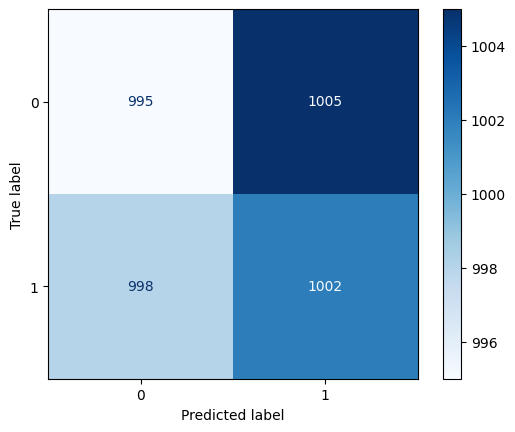

In [84]:
create_summary_for_model_metrics(y_val, predictions, None)